In [1]:
import os
import shutil
import pandas as pd
from pydicom import dcmread
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import json
from PIL import Image

import seaborn as sns
sns.set_theme()
sns.set_context("paper")

import sys

sys.path.append("./")

from dataset import SeriesDataset

data_dir = "/export/gaon1/data/jteneggi/data/rsna-intracranial-hemorrhage-detection"
train_dir = os.path.join(data_dir, "stage_2_train")
train_csv = os.path.join(data_dir, "stage_2_train.csv")
pytorch_train_dir = os.path.join(data_dir, "train")
pytorch_test_dir = os.path.join(data_dir, "test")

train_dataset = SeriesDataset(data_dir=data_dir, op="train")

In [2]:
series_dictionary = train_dataset.series_dictionary

print(f"Found {len(series_dictionary)} unique series.")

Found 21744 unique series.


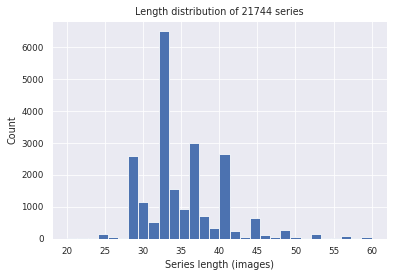

Found 8882 series with and 12862 without hemorrhage.


Text(0.5, 1.0, 'Length distribution of healthy and sick series')

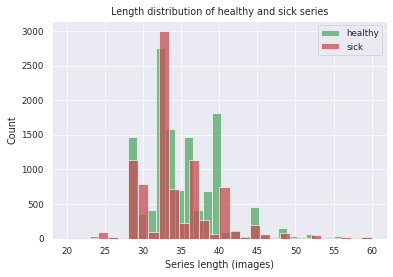

In [3]:
series_l = np.fromiter((len(series["series"]) for _, series in series_dictionary.items()), dtype=int)
plt.hist(series_l, bins=30)
plt.xlabel("Series length (images)")
plt.ylabel("Count")
plt.title(f"Length distribution of {len(series_dictionary)} series")
plt.show()

series_labels = np.fromiter((int(series["target"]) for _, series in series_dictionary.items()), dtype=bool)
print(f"Found {sum(series_labels)} series with and {len(series_labels) - sum(series_labels)} without hemorrhage.")
plt.hist(series_l[series_labels == 0], bins=30, color="g", label="healthy", alpha=.75)
plt.hist(series_l[series_labels == 1], bins=30, color="r", label="sick", alpha=.75)
plt.legend()
plt.xlabel("Series length (images)")
plt.ylabel("Count")
plt.title(f"Length distribution of healthy and sick series")

Series target: 0


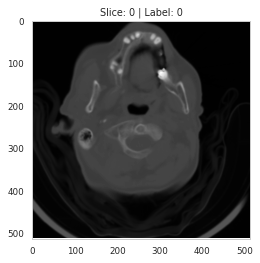

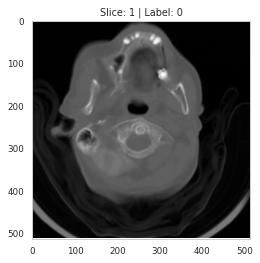

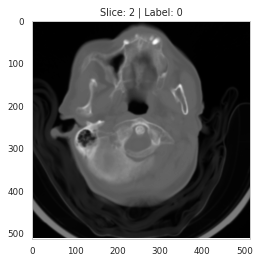

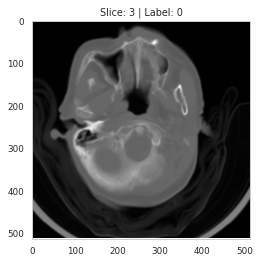

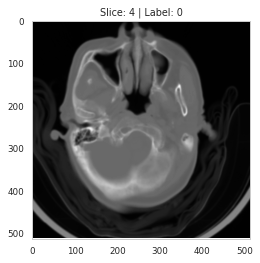

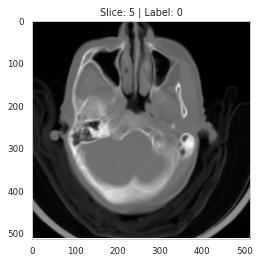

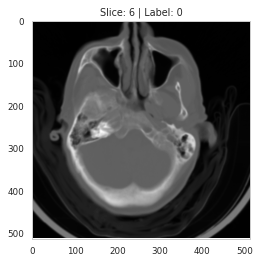

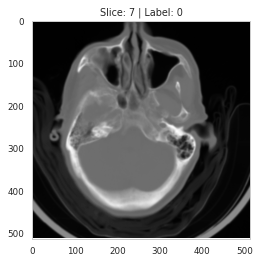

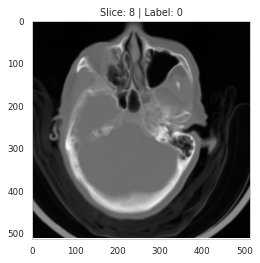

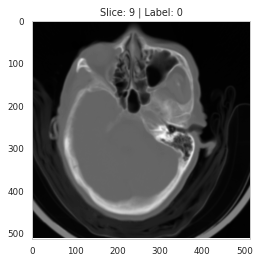

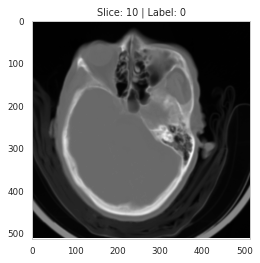

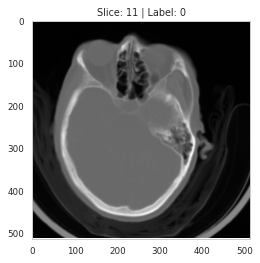

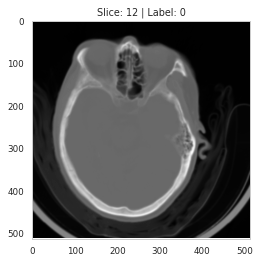

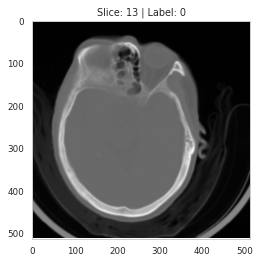

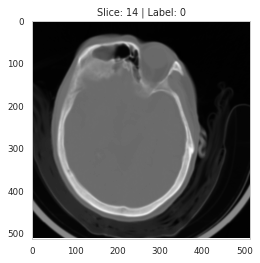

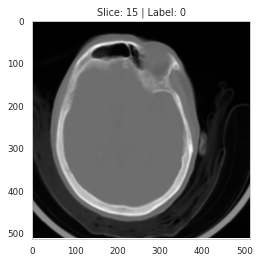

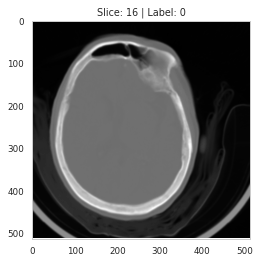

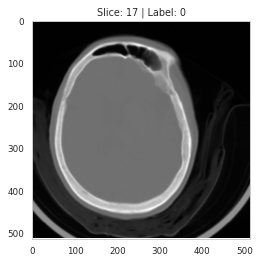

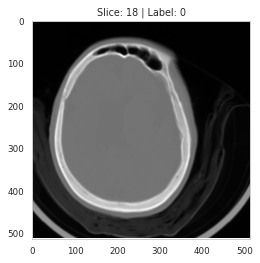

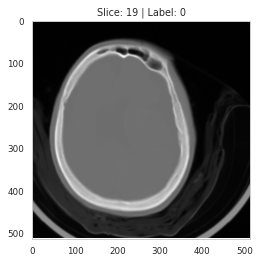

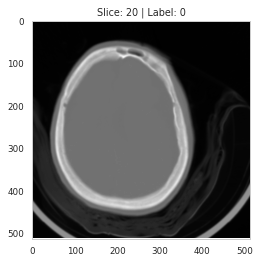

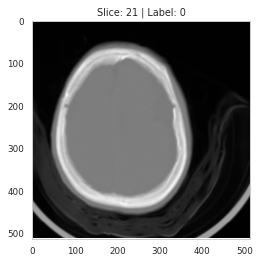

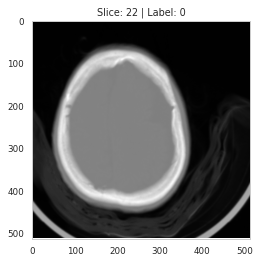

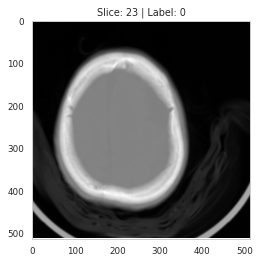

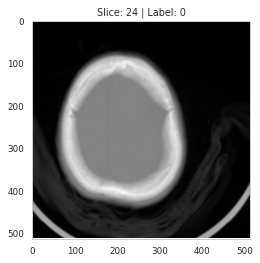

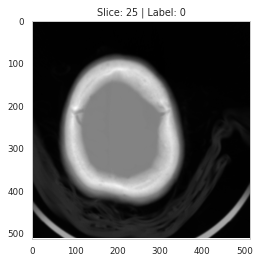

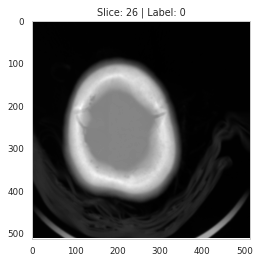

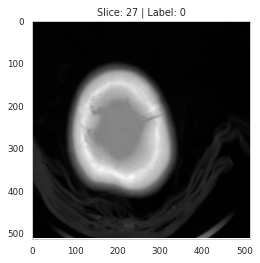

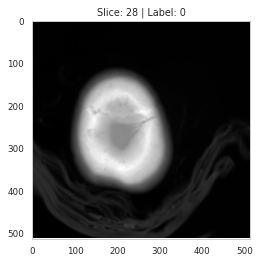

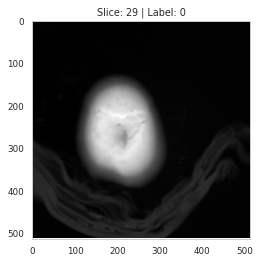

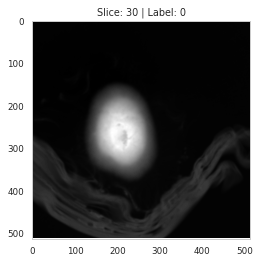

In [10]:
series, target, labels = train_dataset[np.random.choice(range(0, len(train_dataset)))]
print(f"Series target: {target.item()}")

sns.set_style("whitegrid", {'axes.grid' : False})

for i, (image, label) in enumerate(zip(series, labels)):
    plt.imshow(image, cmap="gray")
    plt.title(f"Slice: {i} | Label: {label}")
    plt.show()
    plt.close()